In [140]:
import sys
import tensorflow as tf
import keras
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Concatenate
from keras import optimizers
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from keras import backend as K
from tqdm import tqdm


# reserve only the 30% of the GPU memory
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

In [141]:
batch_size = 512
width = 50
height = 10
channels = 3
classes = 4
epochs = 100
dataset_dir = '/data/user/adipilat/ParticleID/genEvts/new_datasets/padded/'
save_dir = '/data/user/adipilat/ParticleID/models/'
padding = 'padding' + str(height)
model_name= padding +'_newModel'
history_name = model_name + '_history'

# This dictionary should be extended to new classes and antiparticles
class_labels = {22:0, 11:1, 13:2, 211:3}

In [155]:
# arrays of data needed for training

data_array = []
pid_array = []
en_array = []

# read dataset
files = [f for f in os.listdir(dataset_dir) if f.endswith("h5")]

for name in tqdm(files):
    print("Reading file", name)
    data = pd.read_hdf(dataset_dir + name)
    num_tracks = data.trackster.max()
    for i in range(1, num_tracks+1):
        track = data[data['trackster'] == i]
        img = np.array([track.E.values, track.eta.values, track.phi.values]).T.reshape(width, height, channels)
        pid = int(track[track['pid'] != 0].pid.max())
        pid = class_labels[pid]
        en_value = track[track['genE'] != 0].genE.max()
        data_array.append(image)
        pid_array.append(pid)
        en_array.append(en_value)

data_array = np.array(data_array)
pid_array = np.array(pid_array)
pid_array = keras.utils.to_categorical(pid_array, num_classes=classes, dtype='float32')
en_array = np.array(en_array)

  0%|          | 0/4 [00:00<?, ?it/s]

Reading file pion_c_newPadded.h5


 25%|██▌       | 1/4 [01:22<04:08, 82.98s/it]

Reading file gamma_newPadded.h5


 50%|█████     | 2/4 [03:37<03:16, 98.41s/it]

Reading file electron_newPadded.h5


 75%|███████▌  | 3/4 [05:52<01:49, 109.54s/it]

Reading file muon_newPadded.h5


100%|██████████| 4/4 [06:59<00:00, 96.80s/it] 


In [154]:
print(data_array.shape)
print(pid_array.shape)
print(en_array.shape)

(16292, 50, 10, 3)
(16292, 4)
(16292,)


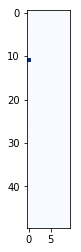

In [153]:
test_img = data_array[0,:,:,:]
plt.imshow(test_img[:,:,0], cmap = 'Blues')